<a href="https://colab.research.google.com/github/Kaushal28/ML/blob/master/K_Means_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt

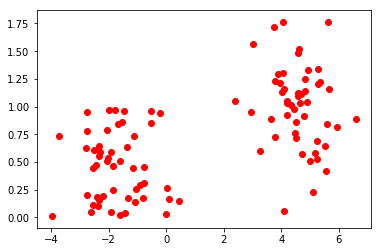

In [0]:
#generate linearly separable data
X, y = make_blobs(n_samples = 100, centers = 2, cluster_std=1.0, n_features = 1, random_state = 1)

#randomize the value of y as it's only generating 0 or 1
y = y*np.random.rand(100) + np.random.rand(100, )
X = X.ravel()
plt.scatter(X, y, color = 'red')
plt.show()

In [0]:
def get_distance(p1, p2):
    return np.linalg.norm(p1-p2)

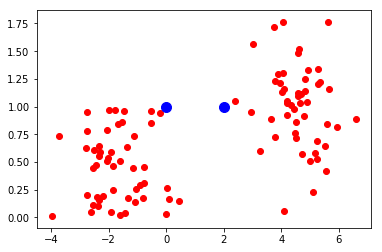

In [0]:
#initialize the k centers (k = 2)
c1 = np.array([0, 1])
c2 = np.array([2, 1])

# plot the centroids along with data
plt.scatter(X, y, color = 'red')
plt.scatter([c1[0], c2[0]], [c1[1], c2[1]], color = 'blue', s = 100)
plt.show()    

In [0]:
#Assign the data points to closest centroids
def assign_closest_points(X, y, c1, c2):
    c1s_list, c2s_list = [], []
    for x_, y_ in zip(X, y):
        point = np.array([x_.tolist(), y_.tolist()])
        if get_distance(point, c1) < get_distance(point, c2):
            c1s_list.append(point)
        else:
            c2s_list.append(point)
    return c1s_list, c2s_list 

In [0]:
def simplify_arrays(array):
    return np.stack(array, axis = 0)

# simplify the arrays
# c1s_list, c2s_list = simplify_arrays(c1s_list), simplify_arrays(c2s_list)

In [0]:
# get mean of given points
def get_mean(points):
    return np.array([np.mean(points[:, :1]), np.mean(points[:, 1:])])

In [0]:
# update the centroids
no_of_itrs = 0
while True:
    prev_c1, prev_c2 = c1, c2
    
    no_of_itrs += 1
    c1s_list, c2s_list  = assign_closest_points(X, y, c1, c2)
    
    # simplify the arrays
    c1s_list, c2s_list = simplify_arrays(c1s_list), simplify_arrays(c2s_list)
    
    c1 = get_mean(c1s_list)
    c2 = get_mean(c2s_list)

    if np.linalg.norm(prev_c1 - c1) <= 0.000000001 and np.linalg.norm(prev_c2 - c2) <= 0.000000001:
      break

print ('Calculated centroids {0} and {1} in {2} iteration(s).'.format(c1, c2, no_of_itrs))

Calculated centroids [-1.70636812  0.45539643] and [4.56975959 1.00874661] in 2 iteration(s).


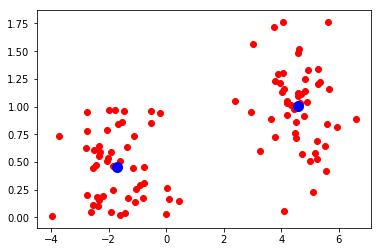

In [0]:
# plot the centroids along with data
plt.scatter(X, y, color = 'red')
plt.scatter([c1[0], c2[0]], [c1[1], c2[1]], color = 'blue', s = 100)
plt.show()   